<a href="https://colab.research.google.com/github/WiIIiamTang/term_project_360-420-w2019-section2-Tang-Dinh/blob/master/UCI_wine_data_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of *Adult* dataset from UCI ML Repository
##  Bhatnagar
360-420 DW Winter 2019
Dawson College

# Import Packages

In [0]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# Set path to data and columns names

In [0]:
url_path='https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

names_list=[
    'age',
    'work-class',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'TARGET',
]

categorical_vars = [
    'work-class',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]

vars_omit = ['fnlwgt','education-num','TARGET']

continuous_vars = [v for v in names_list if v not in categorical_vars and v not in vars_omit]

print("Continuous Variables: " + str(continuous_vars))
print("Categorical Variables: " + str(categorical_vars))
print("Target Variables: " + 'TARGET')


Continuous Variables: ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Variables: ['work-class', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Target Variables: TARGET


# Load the data from UCI Machine Learning Repository

In [0]:
f=requests.get(url_path)

df=pd.read_csv(
    io.StringIO(
        f.content.decode('utf-8')
    ),
    header=None,
    names=names_list
)

# Inspect The first few columns

In [0]:
df.tail(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,TARGET
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Distributions of *Continous* Variables

In [0]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
def boxplot_by_target_class(continuous_var):
  
  fig, ax = plt.subplots(figsize=(10,8))

  axes = df.boxplot(column=continuous_var, by='TARGET',ax=ax)

  return axes

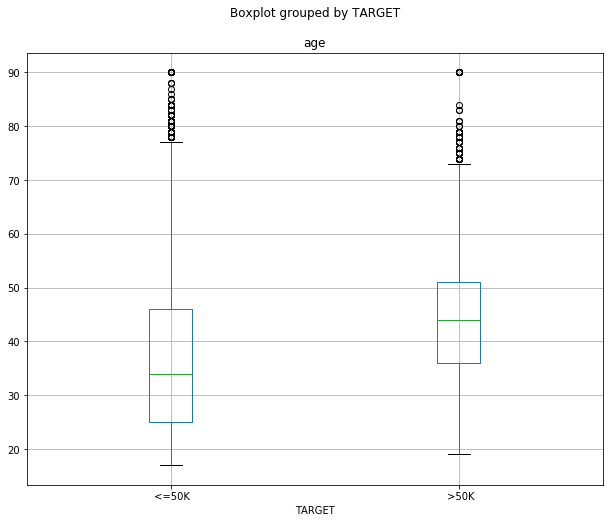

In [0]:
v=continuous_vars[0]
boxplot_by_target_class(v)

# Distributions of *Categorical* Variables by Target Class

In [0]:
# change the index to see different splits of different variables
v = categorical_vars[3]


df.groupby('TARGET')[v].value_counts()

TARGET  occupation        
 <=50K   Adm-clerical         3263
         Craft-repair         3170
         Other-service        3158
         Sales                2667
         Prof-specialty       2281
         Exec-managerial      2098
         Machine-op-inspct    1752
         ?                    1652
         Handlers-cleaners    1284
         Transport-moving     1277
         Farming-fishing       879
         Tech-support          645
         Protective-serv       438
         Priv-house-serv       148
         Armed-Forces            8
 >50K    Exec-managerial      1968
         Prof-specialty       1859
         Sales                 983
         Craft-repair          929
         Adm-clerical          507
         Transport-moving      320
         Tech-support          283
         Machine-op-inspct     250
         Protective-serv       211
         ?                     191
         Other-service         137
         Farming-fishing       115
         Handlers-cleaners  

# Distributions of *Continous* Variables by Target Class

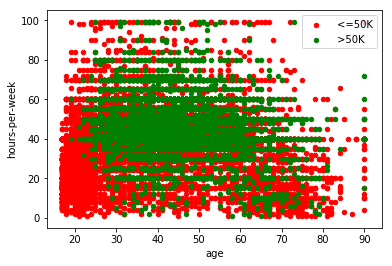

In [0]:
# legend for coloring the different target classes
colors = {' <=50K':'red', ' >50K':'green'}

# choose the continuous vars for scatter plot 
var1='age'
var2='hours-per-week'

fig, ax = plt.subplots()
grouped = df.groupby('TARGET')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=var1, y=var2, label=key, color=colors[key])

plt.show()

In [0]:
var1='age'
df.groupby('TARGET')[var1].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0
